In [10]:
%matplotlib inline

from tqdm import tqdm
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()


##### Task at hand:

```
1. Generate plots:
i) A grid of 9 distribution plots, describing the class distribution for each of the 9 labelled contextual attributes (field_of_view, glare, lighting_condition, pano_status, platform, quality, reflection, view_direction, weather), for the training + testing sets combined. Data files are located on the Alienware at H:\Yujun\global_streetscapes\TRAIN_TEST
ii) A grid of 6 distribution plots, describing the distribution of selected attributes, among all 7 million images. Data files are located on the Alienware at H:\Yujun\global_streetscapes\CSV_ENRICH_7M. The attributes to be plotted are:
Categorical / string variables:
simplemaps.csv - ‘continent’
ghsl.csv - ‘urban_term’
metadata.csv - ‘season’, ‘projection_type’
osm.csv - ‘highway’ (just include top few classes and ignore the smaller classes)
Continuous / float variables:
ephem.csv - hrs_aft_sunrise & hrs_aft_sunset (both on one graph, maybe coloured in different shades)
```


### Set paths accordingly

In [1]:
img_metadata_path = "/Users/yujun/Data/student_labelled/LABELS/TRAIN_TEST"

### Re-compute the values using Dask

#### Load the Pickle file instead

In [69]:


fn_dict = {0: {'fn': '/Users/yujun/Data/global_streetscapes/all/tables/simplemaps.csv','key_attribute': 'continent','dtype':{'capital': 'object'}},
           1: {'fn': '/Users/yujun/Data/global_streetscapes/all/tables/ghsl.csv','key_attribute': 'urban_term','dtype':{}},
           2: {'fn': '/Users/yujun/Data/global_streetscapes/all/tables/metadata.csv', 'key_attribute': ['projection_type',
                                                                        'season'],
                                                                          'dtype':{'kv_address': 'object',
                                                                                   'kv_autoImgProcessingResult': 'object',
                                                                                   'kv_autoImgProcessingStatus': 'object',
                                                                                   'kv_cameraParameters': 'object',
                                                                                   'kv_countryCode': 'object',
                                                                                   'kv_dateAdded': 'object',
                                                                                   'kv_dateProcessed': 'object',
                                                                                   'kv_deviceName': 'object',
                                                                                   'kv_filepath': 'object',
                                                                                   'kv_filepathLTh': 'object',
                                                                                   'kv_filepathProc': 'object',
                                                                                   'kv_filepathTh': 'object',
                                                                                   'kv_fileurl': 'object',
                                                                                   'kv_fileurlLTh': 'object',
                                                                                   'kv_fileurlProc': 'object',
                                                                                   'kv_fileurlTh': 'object',
                                                                                   'kv_imagePartProjection': 'object',
                                                                                   'kv_name': 'object',
                                                                                   'kv_orgCode': 'object',
                                                                                   'kv_qualityDetails': 'object',
                                                                                   'kv_qualityStatus': 'object',
                                                                                   'kv_sequenceType': 'object',
                                                                                   'kv_shotDate': 'object',
                                                                                   'kv_status': 'object',
                                                                                   'kv_storage': 'object',
                                                                                   'kv_user': 'object',
                                                                                   'kv_visibility': 'object'}},
           3: {'fn': '/Users/yujun/Data/global_streetscapes/all/tables/osm.csv', 'key_attribute': 'highway',
                                                   'dtype':{'area': 'object',
                                                           'bridge': 'object',
                                                           'est_width': 'object',
                                                           'junction': 'object',
                                                           'lanes': 'object',
                                                           'maxspeed': 'object',
                                                           'road_width': 'object',
                                                           'service': 'object',
                                                           'tunnel': 'object'}
                                                              },                                   
                                                            }

cnts_dict = {}

for i in tqdm(fn_dict.keys(),'computing counts on enriched data...'):

    if isinstance(fn_dict[i]['key_attribute'],list):
        for val in fn_dict[i]['key_attribute']:
            df = dd.read_csv(fn_dict[i]['fn'],dtype=fn_dict[i]['dtype'])
            out_cnts = df[val].value_counts().compute() 
            cnts_dict[val] = out_cnts
        
        continue
        
    df = dd.read_csv(fn_dict[i]['fn'],dtype=fn_dict[i]['dtype'])
    out_cnts = df[fn_dict[i]['key_attribute']].value_counts().compute()
    cnts_dict[fn_dict[i]['key_attribute']] = out_cnts



computing counts on enriched data...:   0%|               | 0/4 [00:00<?, ?it/s]/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/dask/dataframe/io/csv.py:140: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(
computing counts on enriched data...:  50%|███▌   | 2/4 [00:15<00:14,  7.47s/it]/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/dask/dataframe/io/csv.py:140: DtypeWarning: Columns (14,18,28,29,31,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(
/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/dask/dataframe/io/csv.py:140: DtypeWarning: Columns (14,18,28,29,31,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(
/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/dask/dataframe/io/csv.py:140: DtypeWarning: Columns (31) have mixed types.Specify d

### Replicate stuff

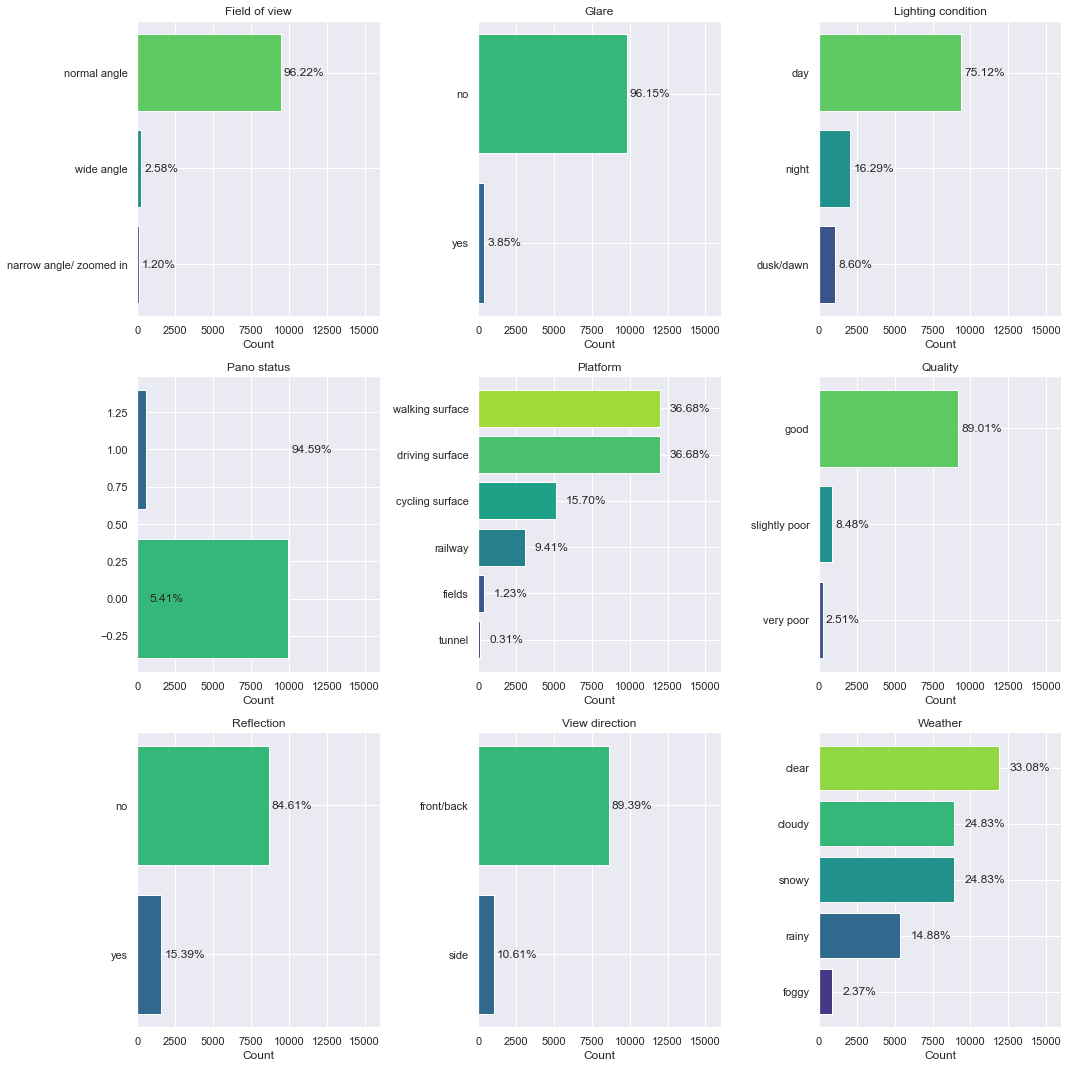

In [17]:
# Function to load and combine data from train and test sets for a given attribute
def combine_train_test_data(attribute, extract_path):
    train_path = os.path.join(extract_path, "train", f"{attribute}.csv")
    test_path = os.path.join(extract_path, "test", f"{attribute}.csv")
    
    # Load the data
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    
    # Combine the data
    combined_data = pd.concat([train_data, test_data], ignore_index=True)
    
    return combined_data

# Define paths
extract_path = img_metadata_path
attributes = [
    "field_of_view", "glare", "lighting_condition", 
    "pano_status", "platform", "quality", 
    "reflection", "view_direction", "weather"
]

# Load and combine data for all attributes
combined_data_dict = {attribute: combine_train_test_data(attribute, extract_path) for attribute in attributes}

# Create a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot data for each attribute in a 3x3 grid with the corrected order
for idx, attribute in enumerate(attributes):
    # Get the data for the attribute
    data = combined_data_dict[attribute][attribute].value_counts().sort_values(ascending=True)
    
    # Sorted data
    sorted_values = data.values
    sorted_categories = data.index
    
    # Determine the current subplot's row and column
    row, col = divmod(idx, 3)
    
    # Plot the horizontal bars
    axes[row, col].barh(sorted_categories, sorted_values, color=sns.color_palette("viridis", len(sorted_categories)))
    
    # Calculate and display the percentage contribution on top of each bar
    total = np.sum(sorted_values)
    for i, value in enumerate(sorted_values):
        percentage = (value / total) * 100
        axes[row, col].text(value + (0.02 * total), i, f"{percentage:.2f}%", ha='left', va='center')
    
    # Adjust x-limit for clarity
    max_val = np.max(sorted_values)
    axes[row, col].set_xlim(0, 16000)
    
    # Set title and labels
    axes[row, col].set_title(f"{attribute.replace('_', ' ').capitalize()}")
    axes[row, col].set_xlabel("Count")
    axes[row, col].set_ylabel("")


# Adjust layout and display
plt.tight_layout()
plt.show()


In [20]:
combined_data_dict['pano_status']['pano_status'].value_counts()

False    9974
True      570
Name: pano_status, dtype: int64

### Plot the first set of plots

In [23]:
# Function to load and combine data from train and test sets for a given attribute
def combine_train_test_data(attribute, extract_path):
    train_path = os.path.join(extract_path, "train", f"{attribute}.csv")
    test_path = os.path.join(extract_path, "test", f"{attribute}.csv")
    
    # Load the data
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    
    # Combine the data
    combined_data = pd.concat([train_data, test_data], ignore_index=True)
    
    return combined_data


In [204]:
# Define paths and extract the zip file
extract_path = img_metadata_path

# List of attributes
attributes = [
    "platform", "weather", "view_direction", 
    "lighting_condition", "pano_status", "field_of_view", 
    "quality", "glare", "reflection" 
]

# Load and combine data for all attributes
combined_data_dict = {attribute: combine_train_test_data(attribute, extract_path) for attribute in attributes}


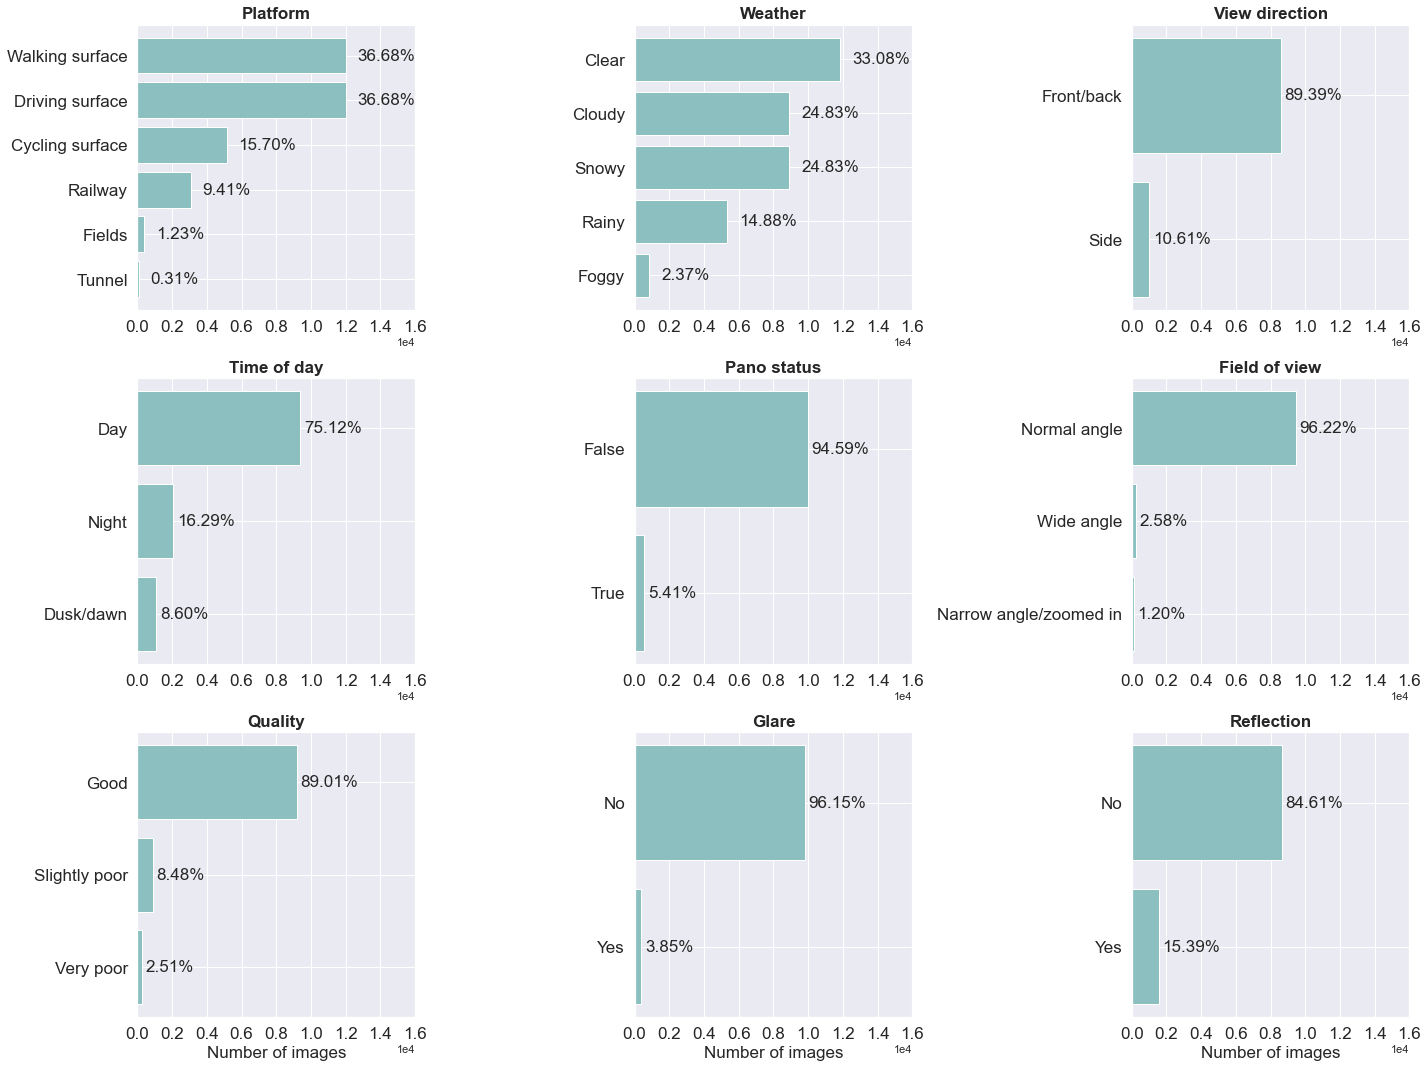

In [206]:
# Set default Seaborn theme
sns.set_theme()

# Create a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Plot data for each attribute in the 3x3 grid
for idx, attribute in enumerate(attributes):
    # Get the data for the attribute
    data = combined_data_dict[attribute][attribute].value_counts().sort_values(ascending=True)
    
    # Sorted data
    sorted_values = data.values
    
    # Capitalizing the first letter of each category, handling booleans, and ensuring no spaces around '/'
    sorted_categories = [
        str(cat).capitalize().replace(' /', '/').replace('/ ','/') if not isinstance(cat, bool) 
        else str(cat) for cat in data.index
    ]
    
    # Determine the current subplot's row and column
    row, col = divmod(idx, 3)
    
    # Plot the horizontal bars
    axes[row, col].barh(sorted_categories, sorted_values, color='#8CC0C0') # #998cc0 #8CC0C0
    
    # Calculate and display the percentage contribution on top of each bar
    total = np.sum(sorted_values)
    for i, value in enumerate(sorted_values):
        percentage = (value / total) * 100
        axes[row, col].text(value + (0.02 * total), i, f"{percentage:.2f}%", ha='left', va='center', fontsize=17)
    
    # Adjust x-limit to be 105% of the maximum value for clarity
    max_val = np.max(sorted_values)
    axes[row, col].set_xlim(0, 16000)
    
    # Set title and labels
    axes[row, col].set_title(f"{attribute.replace('_', ' ').capitalize()}", fontsize=17, fontweight='bold')
    if attribute == 'lighting_condition':
        axes[row, col].set_title("Time of day", fontsize=17, fontweight='bold')
    if row == 2:
        axes[row, col].set_xlabel("Number of images", fontsize=17)
    axes[row, col].set_ylabel("")
    for label in (axes[row, col].get_xticklabels() + axes[row, col].get_yticklabels()): 
        label.set_fontsize(17)
    axes[row, col].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

# Adjust layout and display
plt.tight_layout()
plt.show()
fig.savefig('/Users/yujun/Data/global_streetscapes/maps_figures/figure_5_contextual.png', format='png', dpi=300)

## Load the exogenous variables

In [202]:
# # Save the cleaned dictionary
# with open("./gsc/summary_dict_2023-09-06.pickle", "wb") as f:
#     pickle.dump(cnts_dict, f)

with open('summary_dict_2023-09-06.pickle', 'rb') as handle:
    cnts_dict = pickle.load(handle)

### Continuous values

In [200]:
dfe.sample(5)

,uuid,source,orig_id,timezone,utc_offset_s,calculated_day_night,hrs_aft_sunrise,hrs_aft_sunset
6273700,f3c255fa-1fc4-4c07-ba6d-a2aacc9adc05,Mapillary,500894461036508,Africa/Dar_es_Salaam,10800.0,day,NaN,-0.64
71656,21516441-ce34-407b-b357-492eb09466cb,Mapillary,796089054370708,America/Los_Angeles,-25200.0,day,NaN,-5.19
4832512,d0dbc37a-568d-417b-b995-fa06114ac2f9,Mapillary,114796267684414,Asia/Dubai,14400.0,day,3.42,NaN
7029170,7688c1a7-0548-4c20-9467-ece58331d132,KartaView,185892769,America/Detroit,-14400.0,day,0.35,NaN
6209031,d9b206b6-1724-48bb-8710-34f775106854,Mapillary,165951748692365,America/El_Salvador,-21600.0,night,-5.88,NaN


### Load the `ephem.csv` file

In [60]:
dfe = pd.read_csv('/Users/yujun/Data/global_streetscapes/all/tables/ephem.csv').drop('Unnamed: 0',axis=1) #Trailing index column - TODO: Remove in generation

In [63]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7127577 entries, 0 to 7127576
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   uuid                  object 
 1   source                object 
 2   orig_id               int64  
 3   timezone              object 
 4   utc_offset_s          float64
 5   calculated_day_night  object 
 6   hrs_aft_sunrise       float64
 7   hrs_aft_sunset        float64
 8   year                  int64  
 9   month                 int64  
 10  day                   int64  
 11  hour                  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 652.5+ MB


<Figure size 432x288 with 0 Axes>

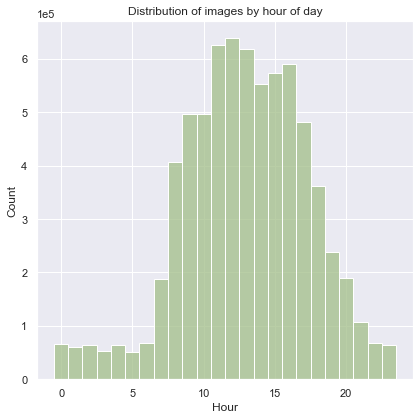

In [107]:
import numpy as np
sns.set_theme()

# # Plotting
# num_levels = 2
# fig, ax = plt.subplots(figsize=(10, 6))
# colors = sns.color_palette("tab10", num_levels)

# for idx,(i,grp) in enumerate(dfe.groupby('calculated_day_night')['hrs_aft_sunrise']):
#     sns.histplot(grp, ax=ax, kde=True, color=colors[0], label=i, element="step", common_norm=False)

# for idx,(i,grp) in enumerate(dfe.groupby('calculated_day_night')['hrs_aft_sunset']):
#     sns.histplot(grp, ax=ax, kde=True, color=colors[1], label=i, element="step", common_norm=False)

# ax.set_title("Distribution of Images by Time of day")
# ax.set_xlabel("Hours")
# ax.set_ylabel("Density")
# ax.legend(title="", loc="upper right")

plt.tight_layout()
plt.show()

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

sns.histplot(dfe['hour'], ax=ax, color='#A2BE89', discrete=True) # #8BB8DE #998cc0

ax.set_title("Distribution of images by hour of day")
ax.set_xlabel("Hour")
ax.set_ylabel("Count")
#ax.legend(title="", loc="upper right")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


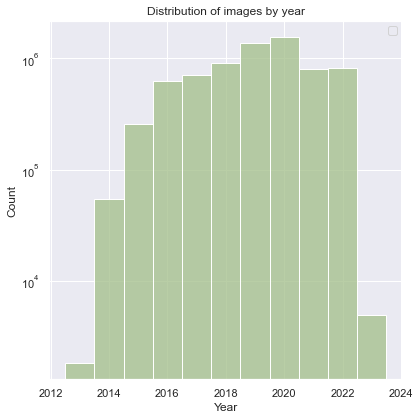

In [102]:
plt.tight_layout()
plt.show()

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

dfyear = dfe[dfe['year']>=2013] 

sns.histplot(dfyear['year'], ax=ax, color='#A2BE89', discrete=True) # #8BB8DE

ax.set_title("Distribution of images by year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend(title="", loc="upper right")
ax.set_yscale('log')
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.005, yval, ha="center")

plt.tight_layout()
plt.show()

In [86]:
dfe['year'].value_counts()

2020    1557513
2019    1382660
2018     911349
2022     828255
2021     795711
2017     703018
2016     623766
2015     259347
2014      54327
2023       4905
2013       1818
2012        941
2000        781
2010        732
2011        679
1970        549
2009        530
2008        312
2006        140
2003         77
2004         63
2007         51
2005         21
1994          9
2002          8
1984          6
1954          1
1990          1
1983          1
1969          1
1910          1
1945          1
1946          1
1916          1
1917          1
Name: year, dtype: int64

In [190]:
trans = pd.read_csv('/Users/yujun/Data/global_streetscapes/all/tables/transportation.csv').drop(columns=['Unnamed: 0'])
trans.info()

/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7127577 entries, 0 to 7127576
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   uuid            object 
 1   source          object 
 2   orig_id         int64  
 3   sequenceIndex   int64  
 4   mly_sequenceId  object 
 5   kv_sequenceId   float64
 6   dist_seq_m      float64
 7   dist_seq_km     float64
 8   time_seq_hr     float64
 9   speed_seq_kph   float64
 10  transportation  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 598.2+ MB


In [198]:
trans_values = trans.transportation.value_counts().sort_values(ascending=True).to_dict()
trans_categories = [k.capitalize() for k in trans_values.keys()]
trans_values = list(trans_values.values())
print(trans_values)
print(trans_categories)

[1006060, 2112281, 4000700]
['Walking', 'Cycling', 'Driving']


In [105]:
perception = pd.read_csv('/Users/yujun/Data/global_streetscapes/model_output/place_pulse/Merge_Perception_Total.csv') #Trailing index column - TODO: Remove in generation

In [106]:
perception.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7127577 entries, 0 to 7127576
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Image_name  object 
 1   Beautiful   float64
 2   Boring      float64
 3   Depressing  float64
 4   Lively      float64
 5   Safe        float64
 6   Wealthy     float64
dtypes: float64(6), object(1)
memory usage: 380.7+ MB


<Figure size 432x288 with 0 Axes>

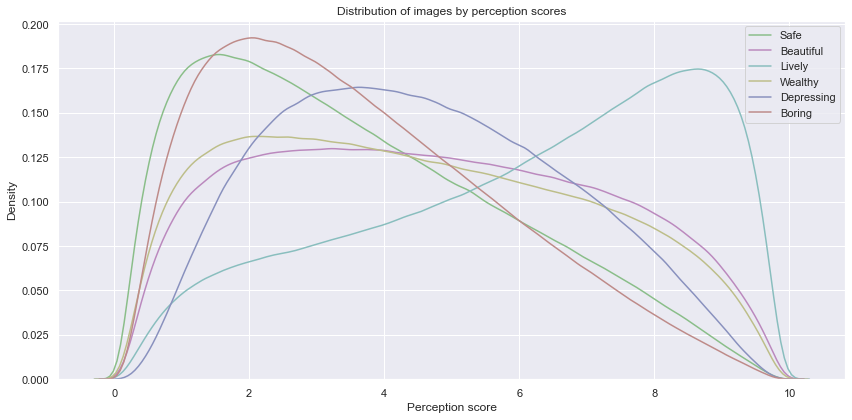

In [135]:
import numpy as np
sns.set_theme()

# # Plotting
# num_levels = 2
# fig, ax = plt.subplots(figsize=(10, 6))
# colors = sns.color_palette("tab10", num_levels)

# for idx,(i,grp) in enumerate(dfe.groupby('calculated_day_night')['hrs_aft_sunrise']):
#     sns.histplot(grp, ax=ax, kde=True, color=colors[0], label=i, element="step", common_norm=False)

# for idx,(i,grp) in enumerate(dfe.groupby('calculated_day_night')['hrs_aft_sunset']):
#     sns.histplot(grp, ax=ax, kde=True, color=colors[1], label=i, element="step", common_norm=False)

# ax.set_title("Distribution of Images by Time of day")
# ax.set_xlabel("Hours")
# ax.set_ylabel("Density")
# ax.legend(title="", loc="upper right")

plt.tight_layout()
plt.show()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# width = 0.03
# sns.histplot(perception['Safe'], ax=ax, color='#89BE91', binwidth=width, kde=True, label='Safe') # #8BB8DE #998cc0
# sns.histplot(perception['Beautiful'], ax=ax, color='#A889BE', binwidth=width, kde=True, label='Beautiful') # #8BB8DE #998cc0
# sns.histplot(perception['Lively'], ax=ax, color='#89BEB8', binwidth=width, kde=True, label='Lively') # #8BB8DE #998cc0
# sns.histplot(perception['Wealthy'], ax=ax, color='#BEBC89', binwidth=width, kde=True, label='Wealthy') # #8BB8DE #998cc0
# sns.histplot(perception['Depressing'], ax=ax, color='#89AABE', binwidth=width, kde=True, label='Depressing') # #8BB8DE #998cc0
# sns.histplot(perception['Boring'], ax=ax, color='#BE8989', binwidth=width, kde=True, label='Boring') # #8BB8DE #998cc0

sns.kdeplot(perception['Safe'], ax=ax, color='#8ABE89', label='Safe') # #8BB8DE #998cc0
sns.kdeplot(perception['Beautiful'], ax=ax, color='#BB89BE', label='Beautiful') # #8BB8DE #998cc0
sns.kdeplot(perception['Lively'], ax=ax, color='#89BEBE', label='Lively') # #8BB8DE #998cc0
sns.kdeplot(perception['Wealthy'], ax=ax, color='#BDBE89', label='Wealthy') # #8BB8DE #998cc0
sns.kdeplot(perception['Depressing'], ax=ax, color='#8991BE', label='Depressing') # #8BB8DE #998cc0
sns.kdeplot(perception['Boring'], ax=ax, color='#BE8B89', label='Boring') # #8BB8DE #998cc0

ax.set_title("Distribution of images by perception scores")
ax.set_xlabel("Perception score")
ax.set_ylabel("Density")
ax.legend(title="", loc="upper right")
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.show()

In [103]:
cnts_dict

{'continent': Europe           2795798
 Asia             1660808
 North America    1437878
 South America     700744
 Africa            391046
 Oceania           141303
 Name: continent, dtype: int64,
 'urban_term': urban centre                6315644
 suburban or peri-urban       357908
 dense urban cluster          259236
 low density rural             98762
 very low density rural        46409
 semi-dense urban cluster      43259
 rural cluster                  5727
 water                           632
 Name: urban_term, dtype: int64,
 'projection_type': perspective        5013724
 fisheye            1435003
 equirectangular     336519
 spherical           264553
 brown                 3419
 cylindrical           1568
 none                     2
 Name: projection_type, dtype: int64,
 'season': Autumn    1903473
 Winter    1797646
 Summer    1751980
 Spring    1674478
 Name: season, dtype: int64,
 'highway': residential                           1262146
 secondary                    

In [186]:
desired_order_list = ['continent', 'urban_term', 'highway', 'projection_type', 'season']

reordered_dict = {k: cnts_dict[k] for k in desired_order_list}

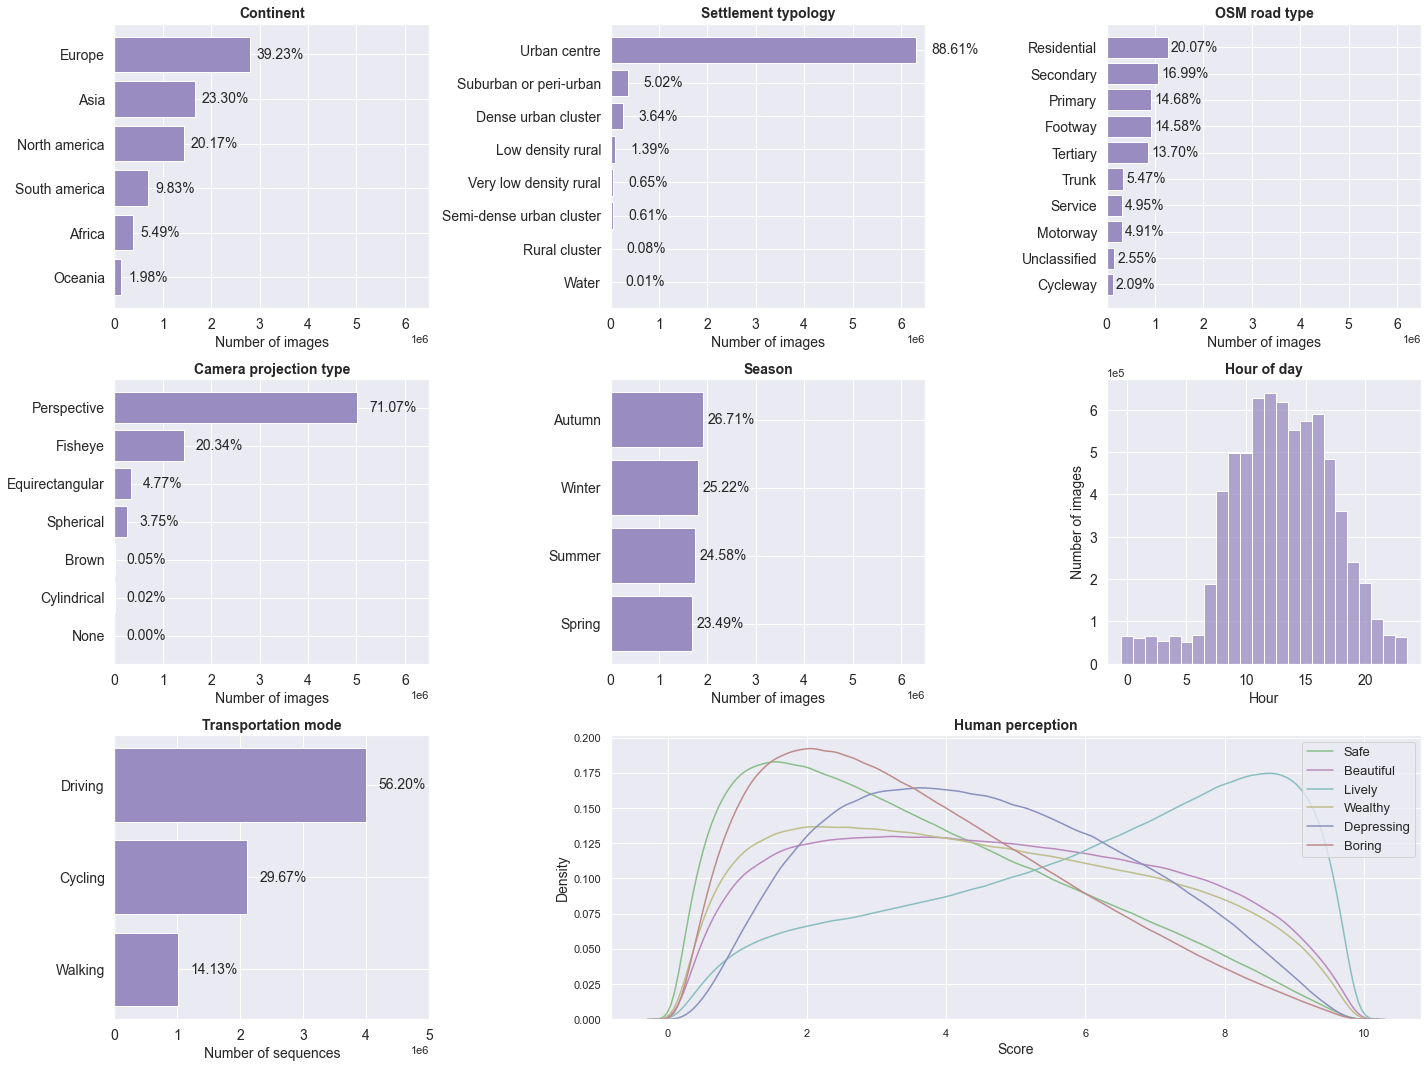

In [203]:
from matplotlib.gridspec import GridSpec

# Creating a 3x2 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

color = '#998cc0'
fontsize = 14
textsize = 14

# Plot data for the attributes in the 3x2 grid
for idx, (attribute, values) in enumerate(reordered_dict.items()):

    if attribute=='highway':
        #Subset only top K levels
        reordered_dict['highway'] = reordered_dict['highway'].nlargest(10)
        attribute,values = attribute,reordered_dict[attribute]
        
    sorted_values = values.sort_values(ascending=True).to_dict()
    sorted_categories = [k.capitalize() for k in sorted_values.keys()]
    sorted_values = list(sorted_values.values())
    
    
    # Determine the current subplot's row and column
    row, col = divmod(idx, 3)
    
    # Plot the horizontal bars
    axes[row, col].barh(sorted_categories, sorted_values, color=color)
    
    # Calculate and display the percentage contribution on top of each bar
    total = np.sum(sorted_values)
    for i, value in enumerate(sorted_values):
        percentage = (value / total) * 100
        axes[row, col].text(value + (0.05 * max(sorted_values)), i, f"{percentage:.2f}%", ha='left', va='center', fontsize=textsize)
    
    # Adjust x-limit for clarity
    max_val = max(sorted_values)
    axes[row, col].set_xlim(0, 6500000)
    #axes[row, col].set_xlim(0, max_val + (0.1 * max_val))
    
    # Set title and labels
    #print(attribute)
    if attribute == 'urban_term':
        axes[row, col].set_title("Settlement typology", fontsize=fontsize, fontweight='bold')
    elif attribute == 'projection_type':
        axes[row, col].set_title("Camera projection type", fontsize=fontsize, fontweight='bold')
    elif attribute == 'highway':
        axes[row, col].set_title("OSM road type", fontsize=fontsize, fontweight='bold')
    else:
        axes[row, col].set_title(attribute.replace('_', ' ').capitalize(), fontsize=fontsize, fontweight='bold')
    axes[row, col].set_xlabel("Number of images", fontsize=fontsize)
    axes[row, col].set_ylabel("")
    for label in (axes[row, col].get_xticklabels() + axes[row, col].get_yticklabels()): 
        label.set_fontsize(fontsize)


# data = {'Day': dfe['hrs_aft_sunrise'],
#        'Night': dfe['hrs_aft_sunset']}


# Plotting the timezone data on the last subplot
# ax = axes[2, 1]
# colors = sns.color_palette("tab10", num_levels)
# for idx, (tz, values) in enumerate(data.items()):
#     sns.histplot(values, ax=ax, kde=True, color=colors[idx], label=tz, element="step", common_norm=False)

# ax.set_title("Distribution of Images by Time of day")
# ax.set_xlabel("Hours")
# ax.set_ylabel("Counts")
# ax.legend(title="", loc="upper right")

ax = axes[1, 2]
sns.histplot(dfe['hour'], ax=ax, color=color, discrete=True) # #8BB8DE #998cc0
ax.set_title("Hour of day", fontsize=fontsize, fontweight='bold')
ax.set_xlabel("Hour", fontsize=fontsize)
ax.set_ylabel("Number of images", fontsize=fontsize)
#ax.legend(title="", loc="upper right")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
for label in (ax.get_xticklabels() + ax.get_yticklabels()): 
    label.set_fontsize(fontsize)

ax = axes[2, 0]
ax.barh(trans_categories, trans_values, color=color)
# Calculate and display the percentage contribution on top of each bar
total = np.sum(trans_values)
for i, value in enumerate(trans_values):
    percentage = (value / total) * 100
    ax.text(value + (0.05 * max(trans_values)), i, f"{percentage:.2f}%", ha='left', va='center', fontsize=textsize)
# Adjust x-limit for clarity
ax.set_xlim(0, 5000000)
ax.set_title("Transportation mode", fontsize=fontsize, fontweight='bold')
ax.set_xlabel("Number of sequences", fontsize=fontsize)
ax.set_ylabel("")
#ax.legend(title="", loc="upper right")
#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
for label in (ax.get_xticklabels() + ax.get_yticklabels()): 
    label.set_fontsize(fontsize)

gs = axes[1, 2].get_gridspec()
#print(gs)
for ax in axes[-1, 1:]:
    ax.remove()
axsbig = fig.add_subplot(gs[-1, 1:])
sns.kdeplot(perception['Safe'], ax=axsbig, color='#8ABE89', label='Safe') # #8BB8DE #998cc0
sns.kdeplot(perception['Beautiful'], ax=axsbig, color='#BB89BE', label='Beautiful') # #8BB8DE #998cc0
sns.kdeplot(perception['Lively'], ax=axsbig, color='#89BEBE', label='Lively') # #8BB8DE #998cc0
sns.kdeplot(perception['Wealthy'], ax=axsbig, color='#BDBE89', label='Wealthy') # #8BB8DE #998cc0
sns.kdeplot(perception['Depressing'], ax=axsbig, color='#8991BE', label='Depressing') # #8BB8DE #998cc0
sns.kdeplot(perception['Boring'], ax=axsbig, color='#BE8B89', label='Boring') # #8BB8DE #998cc0
axsbig.set_title("Human perception", fontsize=fontsize, fontweight='bold')
axsbig.set_xlabel("Score", fontsize=fontsize)
axsbig.set_ylabel("Density", fontsize=fontsize)
axsbig.legend(title="", loc="upper right", fontsize=13)


plt.tight_layout()
plt.savefig('/Users/yujun/Data/global_streetscapes/maps_figures/figure_6_summary.png',dpi=300)
plt.show()


